In [ ]:
import pandas as pd
import numpy as np

file_path = ("C:/Users/user/Desktop/assignment 2 IRS/800subset_user_ratings.csv")
ratings_df = pd.read_csv(file_path)

tnu = ratings_df.shape[0]
Eni = ratings_df.shape[1] - 1 

print(f"Total Number of Users (tnu): {tnu}")
print(f"Total Number of Items (Eni): {Eni}")

Total Number of Users (tnu): 799
Total Number of Items (Eni): 6


In [7]:
import pandas as pd

file_path = 'C:/Users/user/Desktop/assignment 2 IRS/800subset_user_ratings.csv'
ratings_df = pd.read_csv(file_path)

user_missing_ratings = ratings_df.isna().sum(axis=1)

U1 = ratings_df[user_missing_ratings == 2].iloc[0]  
U2 = ratings_df[user_missing_ratings == 3].iloc[0] 
U3 = ratings_df[user_missing_ratings == 5].iloc[0] 

selected_users = {
    "U1 (2 missing ratings)": U1['Unnamed: 0'], 
    "U2 (3 missing ratings)": U2['Unnamed: 0'],
    "U3 (5 missing ratings)": U3['Unnamed: 0']
}

item_missing_percentage = ratings_df.isna().sum(axis=0)[1:] / ratings_df.shape[0] * 100

I1_candidates = item_missing_percentage[(item_missing_percentage >= 4) & (item_missing_percentage < 5)]
I2_candidates = item_missing_percentage[(item_missing_percentage >= 10) & (item_missing_percentage < 11)]

I1 = I1_candidates.index[0] if not I1_candidates.empty else "No items with ~4% missing"
I2 = I2_candidates.index[0] if not I2_candidates.empty else "No items with ~10% missing"

selected_items = {
    "I1 (~4% missing)": I1,
    "I2 (~10% missing)": I2
}

print("Selected Users:", selected_users)
print("Selected Items:", selected_items)

Selected Users: {'U1 (2 missing ratings)': '007Waffles', 'U2 (3 missing ratings)': '11ovz11', 'U3 (5 missing ratings)': 'Athanatos173'}
Selected Items: {'I1 (~4% missing)': 'cleaned thor love thunder', 'I2 (~10% missing)': 'cleaned antman'}


In [8]:
import pandas as pd
import numpy as np

pd.read_csv("C:/Users/user/Desktop/assignment 2 IRS/800subset_user_ratings.csv")
total_ratings_per_item = ratings_df.notna().sum(axis=0)[1:]

print(total_ratings_per_item)

cleaned spiderman noway home    276
cleaned doctorstrange           220
cleaned thor love thunder       767
cleaned black panther           303
cleaned antman                  719
cleaned deadpool wolverine      281
dtype: int64


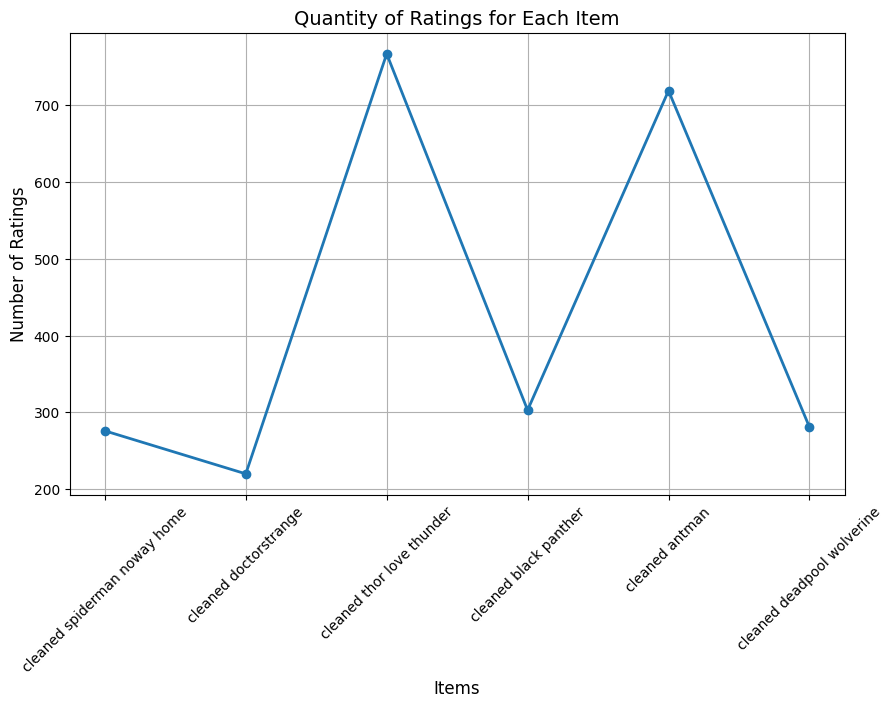

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ratings_per_item = ratings_df.iloc[:, 1:].notna().sum()

plt.figure(figsize=(10, 6))
plt.plot(ratings_per_item.index, ratings_per_item.values, marker='o', linestyle='-', linewidth=2)
plt.title('Quantity of Ratings for Each Item', fontsize=14)
plt.xlabel('Items', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [11]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

file_path = "C:/Users/user/Desktop/assignment 2 IRS/800subset_user_ratings.csv"
df = pd.read_csv(file_path)

df.set_index('Unnamed: 0', inplace=True)

ratings_matrix = df.to_numpy()

n_users = ratings_matrix.shape[0]
cos_sim = np.zeros((n_users, n_users))

for i in range(n_users):
    for j in range(i, n_users):  
        mask = ~np.isnan(ratings_matrix[i]) & ~np.isnan(ratings_matrix[j])

        if np.any(mask):  
            ratings_i = ratings_matrix[i, mask]
            ratings_j = ratings_matrix[j, mask]

            sim = np.dot(ratings_i, ratings_j) / (np.linalg.norm(ratings_i) * np.linalg.norm(ratings_j))
            cos_sim[i, j] = sim
            cos_sim[j, i] = sim 

active_user_thresholds = {
    "007Waffles": 2,
    "11ovz11": 2,
    "Athanatos173": 2
}

user_indices = {user: idx for idx, user in enumerate(df.index)}

ds_discounted_active_users = []

for active_user, threshold in active_user_thresholds.items():
    if active_user not in user_indices:
        print(f"Active user '{active_user}' not found in the dataset. Skipping...")
        continue

    active_user_index = user_indices[active_user] 

    for j in range(n_users):
        if j == active_user_index: 
            continue

        similarity = cos_sim[active_user_index, j]

        common_rated = np.sum(~np.isnan(ratings_matrix[active_user_index]) & ~np.isnan(ratings_matrix[j]))

        df_value = min(common_rated, threshold) / threshold if threshold > 0 else 0

        ds = similarity * df_value

        ds_discounted_active_users.append({
            'active_user': active_user,
            'other_user': df.index[j],
            'similarity': similarity,
            'discount_factor': df_value,
            'discounted_similarity': ds
        })

        print(f"Active User {active_user} with User {df.index[j]} - Similarity: {similarity:.4f},, DF: {df_value:.4f}, DS: {ds:.4f}")


Active User 007Waffles with User 11ovz11 - Similarity: 0.9276,, DF: 1.0000, DS: 0.9276
Active User 007Waffles with User 18Buddha - Similarity: 0.9529,, DF: 1.0000, DS: 0.9529
Active User 007Waffles with User 3xHCCH - Similarity: 0.9995,, DF: 1.0000, DS: 0.9995
Active User 007Waffles with User 80sHorror - Similarity: 0.9980,, DF: 1.0000, DS: 0.9980
Active User 007Waffles with User 851222 - Similarity: 0.9153,, DF: 1.0000, DS: 0.9153
Active User 007Waffles with User ACollegeStudent - Similarity: 0.9616,, DF: 1.0000, DS: 0.9616
Active User 007Waffles with User ANastyGorilla - Similarity: 0.9990,, DF: 1.0000, DS: 0.9990
Active User 007Waffles with User ARTaylor - Similarity: 0.9990,, DF: 1.0000, DS: 0.9990
Active User 007Waffles with User ASBKnight - Similarity: 0.9374,, DF: 1.0000, DS: 0.9374
Active User 007Waffles with User A_Different_Drummer - Similarity: 0.9648,, DF: 1.0000, DS: 0.9648
Active User 007Waffles with User Aaron1375 - Similarity: 0.9939,, DF: 1.0000, DS: 0.9939
Active User